In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.manifold import TSNE

from sklearn.metrics import silhouette_score, davies_bouldin_score

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, HDBSCAN

# Exploratory Data Analysis & Preprocessing

In [2]:
df = pd.read_csv('data/basketball_performance.csv')
df.head()

Unnamed: 0             Name  GamesPlayed  MinutesPlayed  PointsPerGame  \
0           0   Brandon Ingram           36           27.4            7.4   
1           1  Andrew Harrison           35           26.9            7.2   
2           2   JaKarr Sampson           74           15.3            5.2   
3           3      Malik Sealy           58           11.6            5.7   
4           4      Matt Geiger           48           11.5            4.5   

   FieldGoalsMade  FieldGoalsAttempt  FieldGoalPercent  3PointMade  \
0             2.6                7.6              34.7         0.5   
1             2.0                6.7              29.6         0.7   
2             2.0                4.7              42.2         0.4   
3             2.3                5.5              42.6         0.1   
4             1.6                3.0              52.4         0.0   

   3PointAttempt  ...  FreeThrowMade  FreeThrowAttempt  FreeThrowPercent  \
0            2.1  ...            1.6               2.3              69.9   
1            2.8  ...            2.6               3.4              76.5   
2            1.7  ...            0.9               1.3              67.0   
3            0.5  ...            0.9               1.3              68.9   
4            0.1  ...            1.3               1.9              67.4   

   OffensiveRebounds  DefensiveRebounds  Rebounds  Assists  Steals  Blocks  \
0                0.7                3.4       4.1      1.9     0.4     0.4   
1                0.5                2.0       2.4      3.7     1.1     0.5   
2                0.5                1.7       2.2      1.0     0.5     0.3   
3                1.0                0.9       1.9      0.8     0.6     0.1   
4                1.0                1.5       2.5      0.3     0.3     0.4   

   Turnovers  
0        1.3  
1        1.6  
2        1.0  
3        1.0  
4        0.8  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1340 non-null   int64  
 1   Name               1340 non-null   object 
 2   GamesPlayed        1340 non-null   int64  
 3   MinutesPlayed      1340 non-null   float64
 4   PointsPerGame      1340 non-null   float64
 5   FieldGoalsMade     1340 non-null   float64
 6   FieldGoalsAttempt  1340 non-null   float64
 7   FieldGoalPercent   1340 non-null   float64
 8   3PointMade         1340 non-null   float64
 9   3PointAttempt      1340 non-null   float64
 10  3PointPercent      1329 non-null   float64
 11  FreeThrowMade      1340 non-null   float64
 12  FreeThrowAttempt   1340 non-null   float64
 13  FreeThrowPercent   1340 non-null   float64
 14  OffensiveRebounds  1340 non-null   float64
 15  DefensiveRebounds  1340 non-null   float64
 16  Rebounds           1340 

Notes:

- There are a few missing values.
- Most of the columns, excluding 'Name', are numeric.
- The index column and the 'Name' can be dropped.

In [4]:
df.drop(['Unnamed: 0', 'Name'], axis=1, inplace=True)

In [5]:
df.describe()

GamesPlayed  MinutesPlayed  PointsPerGame  FieldGoalsMade  \
count  1340.000000    1340.000000    1340.000000     1340.000000   
mean     60.414179      17.624627       6.801493        2.629104   
std      17.433992       8.307964       4.357545        1.683555   
min      11.000000       3.100000       0.700000        0.300000   
25%      47.000000      10.875000       3.700000        1.400000   
50%      63.000000      16.100000       5.550000        2.100000   
75%      77.000000      22.900000       8.800000        3.400000   
max      82.000000      40.900000      28.200000       10.200000   

       FieldGoalsAttempt  FieldGoalPercent   3PointMade  3PointAttempt  \
count        1340.000000       1340.000000  1340.000000    1340.000000   
mean            5.885299         44.169403     0.247612       0.779179   
std             3.593488          6.137679     0.383688       1.061847   
min             0.800000         23.800000     0.000000       0.000000   
25%             3.300000         40.200000     0.000000       0.000000   
50%             4.800000         44.100000     0.100000       0.300000   
75%             7.500000         47.900000     0.400000       1.200000   
max            19.800000         73.700000     2.300000       6.500000   

       3PointPercent  FreeThrowMade  FreeThrowAttempt  FreeThrowPercent  \
count    1329.000000    1340.000000       1340.000000       1340.000000   
mean       19.308126       1.297687          1.821940         70.300299   
std        16.022916       0.987246          1.322984         10.578479   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.600000          0.900000         64.700000   
50%        22.400000       1.000000          1.500000         71.250000   
75%        32.500000       1.600000          2.300000         77.600000   
max       100.000000       7.700000         10.200000        100.000000   

       OffensiveRebounds  DefensiveRebounds     Rebounds      Assists  \
count        1340.000000        1340.000000  1340.000000  1340.000000   
mean            1.009403           2.025746     3.034478     1.550522   
std             0.777119           1.360008     2.057774     1.471169   
min             0.000000           0.200000     0.300000     0.000000   
25%             0.400000           1.000000     1.500000     0.600000   
50%             0.800000           1.700000     2.500000     1.100000   
75%             1.400000           2.600000     4.000000     2.000000   
max             5.300000           9.600000    13.900000    10.600000   

            Steals       Blocks    Turnovers  
count  1340.000000  1340.000000  1340.000000  
mean      0.618507     0.368582     1.193582  
std       0.409759     0.429049     0.722541  
min       0.000000     0.000000     0.100000  
25%       0.300000     0.100000     0.700000  
50%       0.500000     0.200000     1.000000  
75%       0.800000     0.500000     1.500000  
max       2.500000     3.900000     4.400000

Notes:
- All values are non-negative, ranging from 0 to 100.

In [ ]:
df['3PointPercent'].fillna(df['3PointPercent'].mean(), inplace=True)

In [7]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df > (Q3 + 1.5 * IQR)).sum()

GamesPlayed           0
MinutesPlayed         0
PointsPerGame        58
FieldGoalsMade       52
FieldGoalsAttempt    63
FieldGoalPercent     14
3PointMade           71
3PointAttempt        68
3PointPercent         4
FreeThrowMade        74
FreeThrowAttempt     76
FreeThrowPercent      5
OffensiveRebounds    39
DefensiveRebounds    53
Rebounds             48
Assists              83
Steals               57
Blocks               75
Turnovers            67
dtype: int64

Notes:
- There are many columns which could contain outliers.

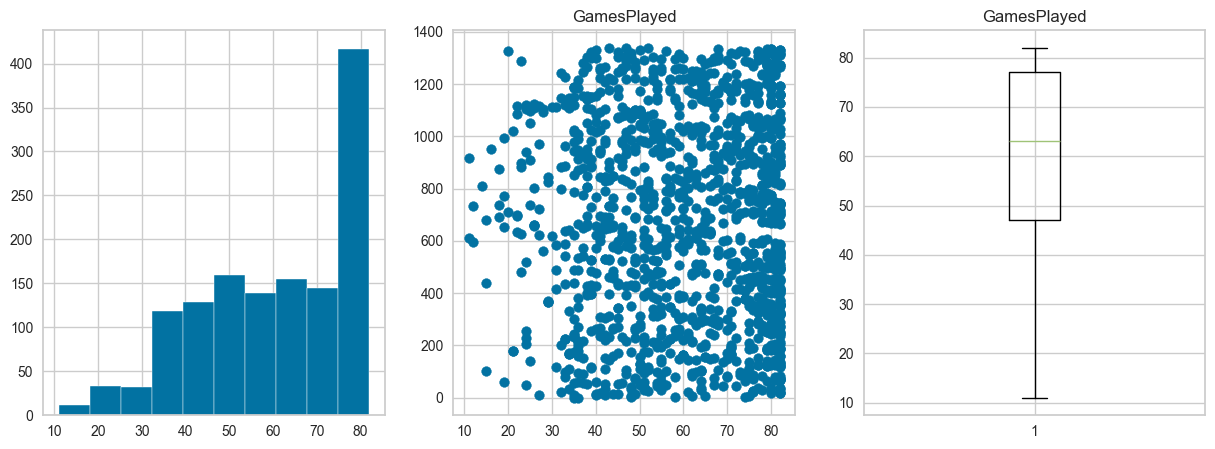

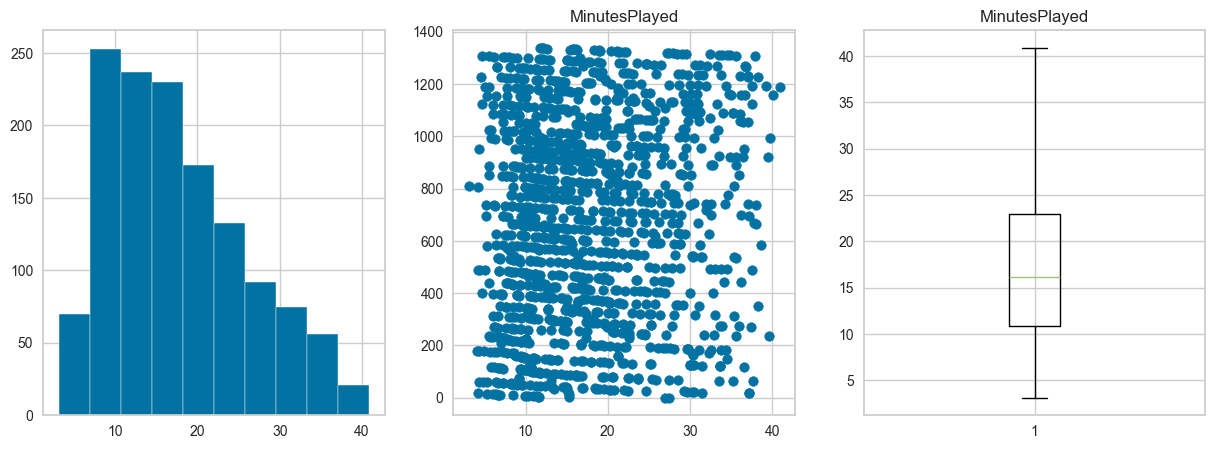

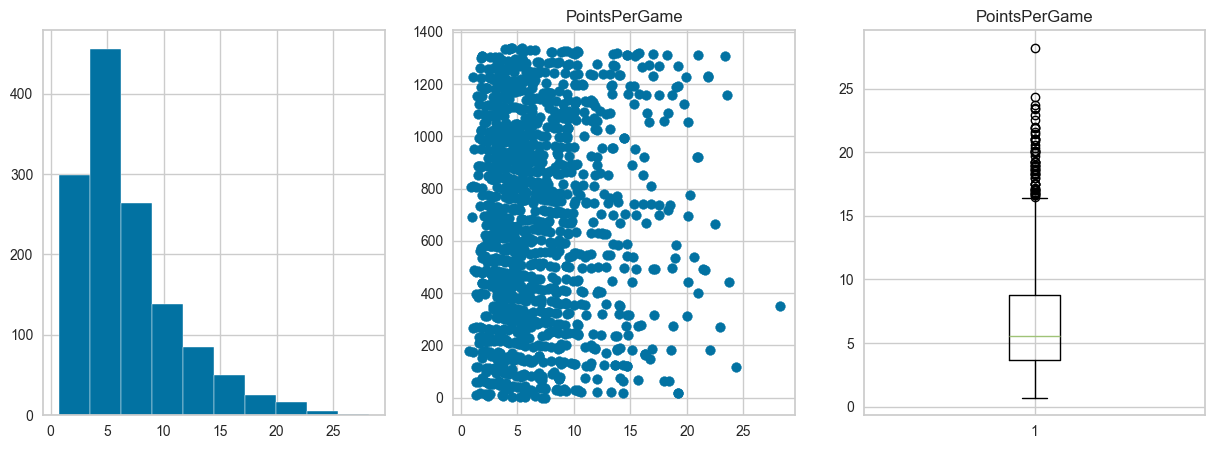

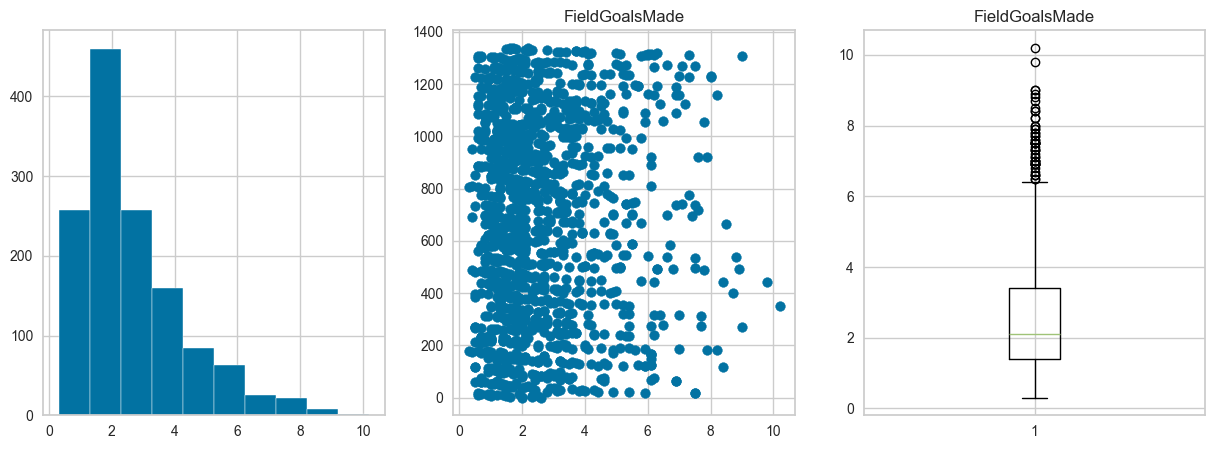

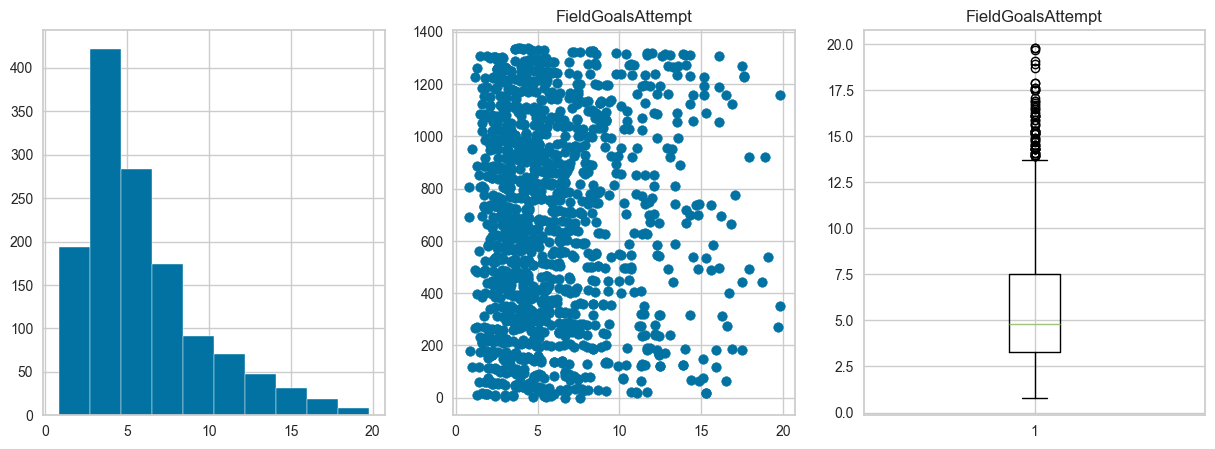

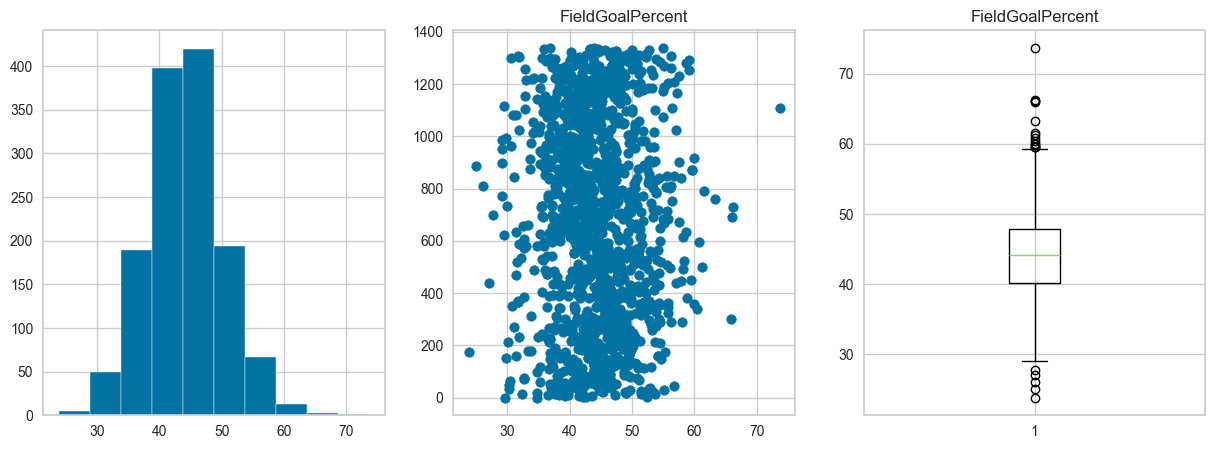

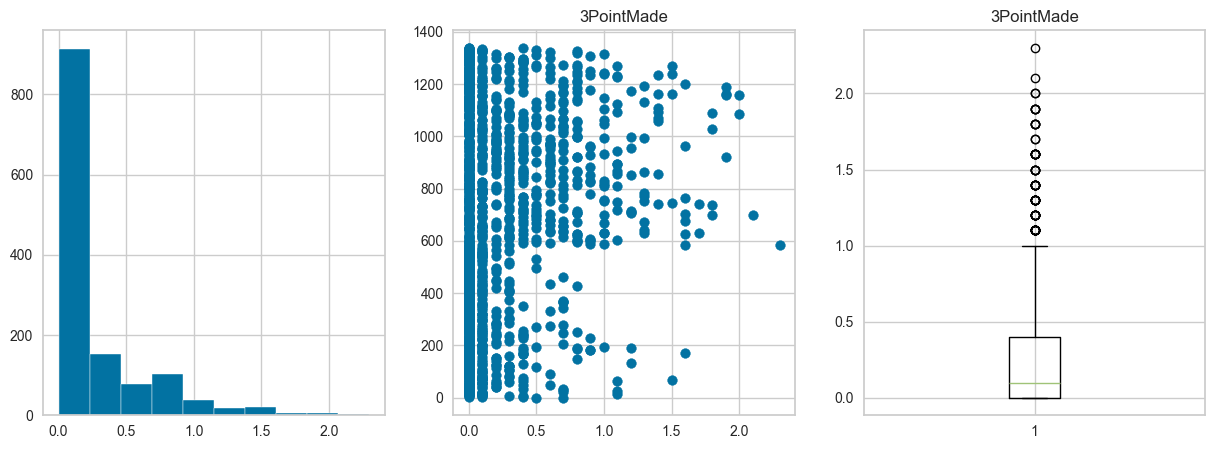

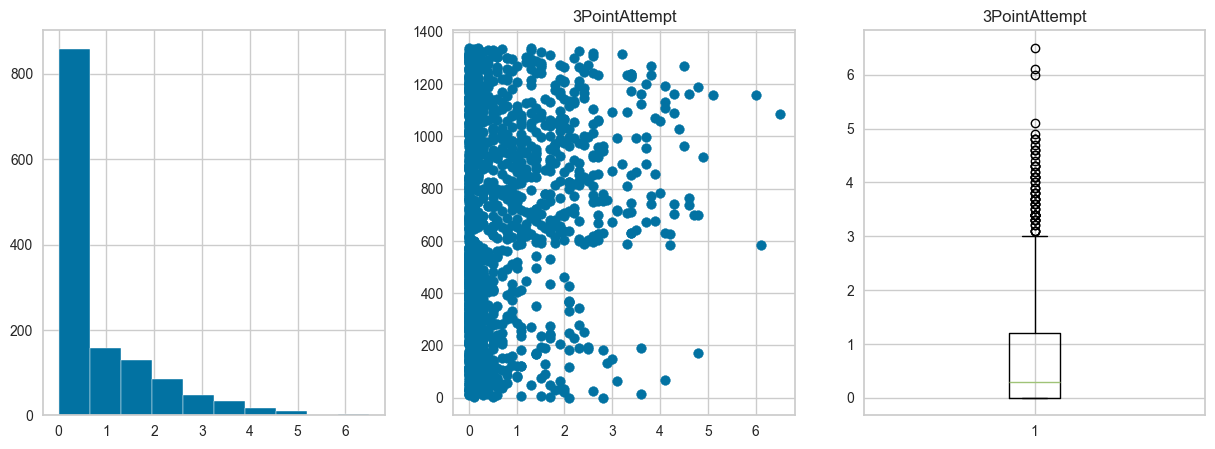

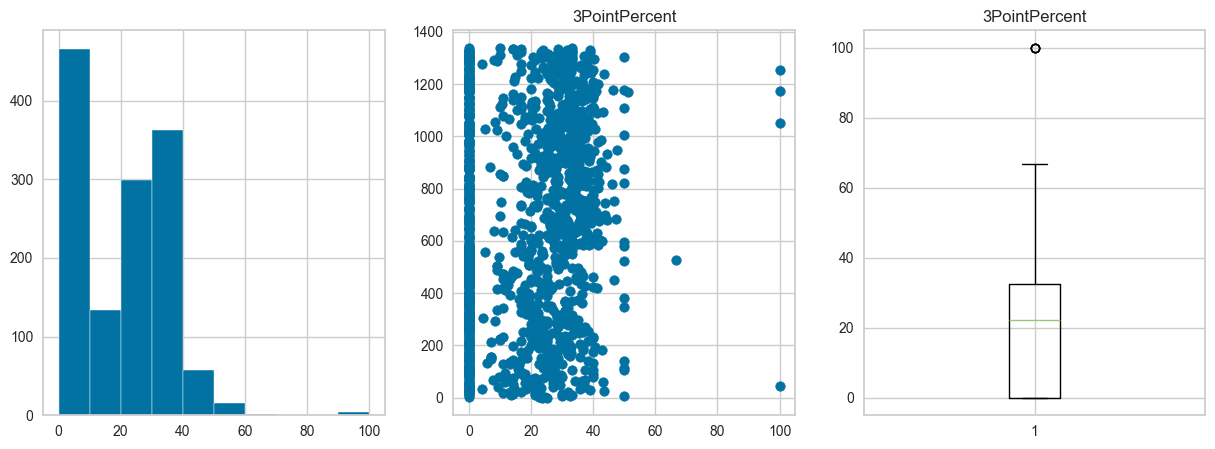

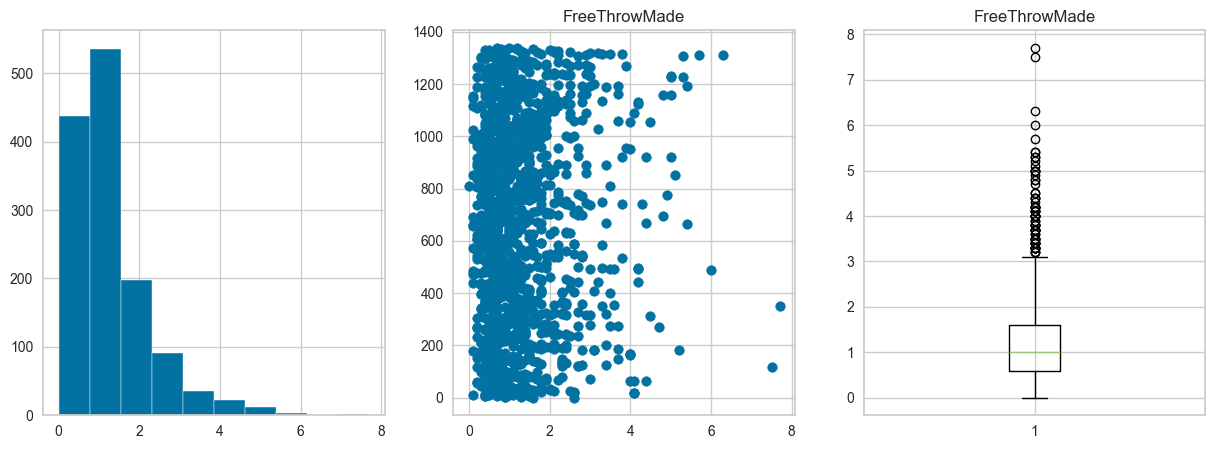

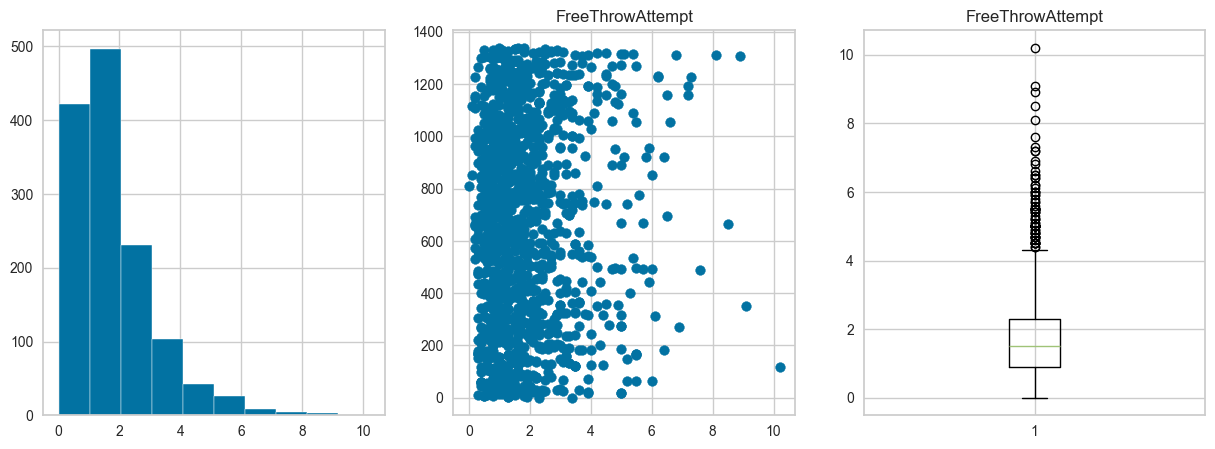

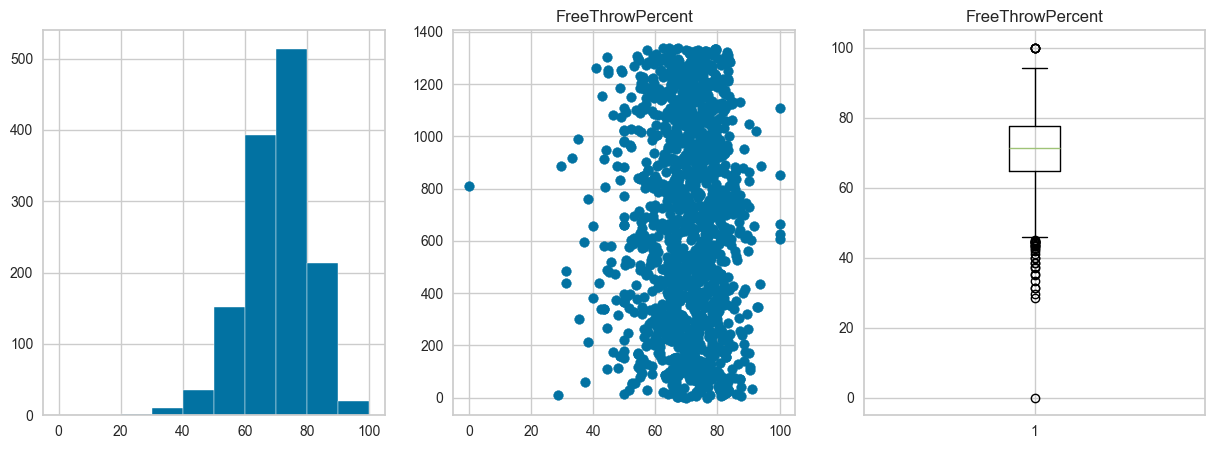

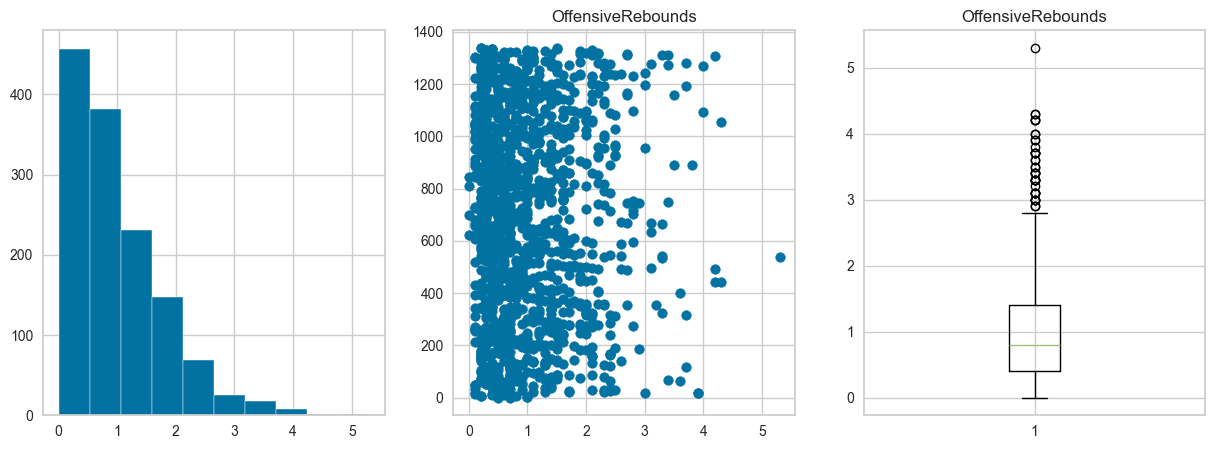

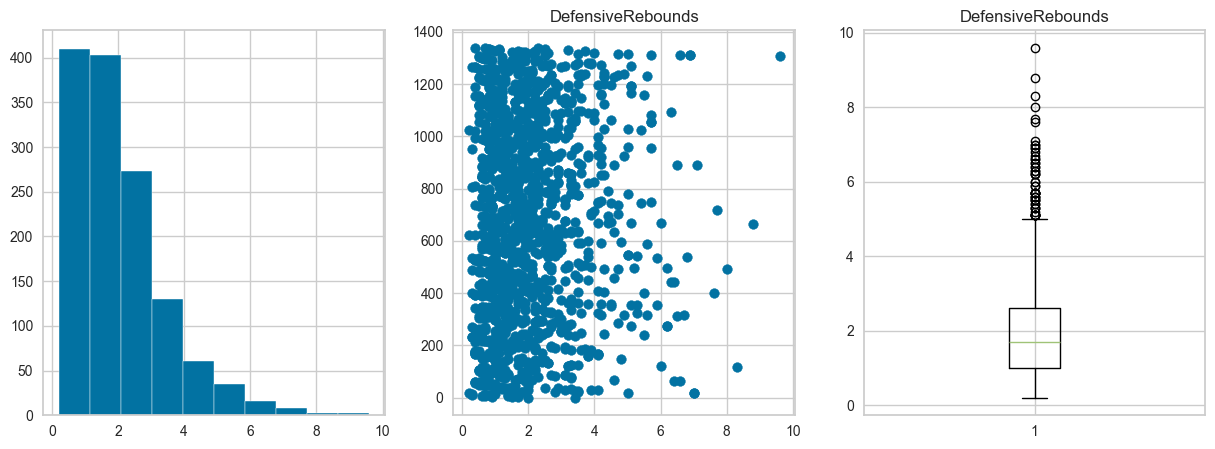

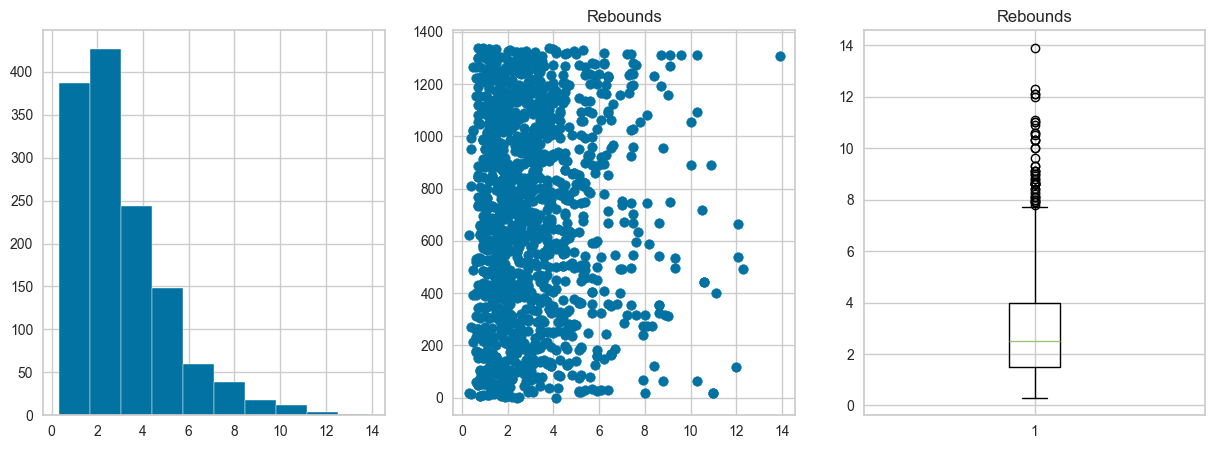

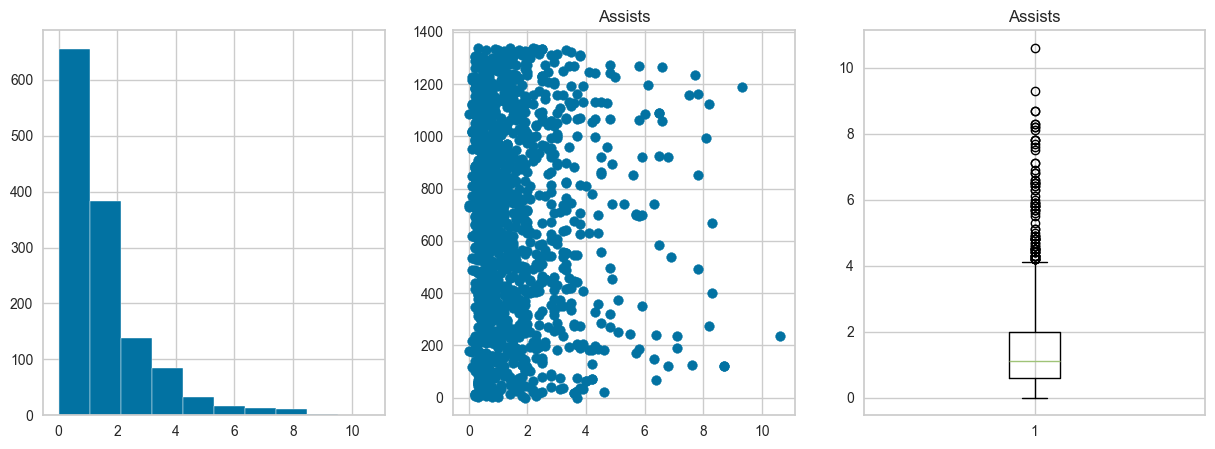

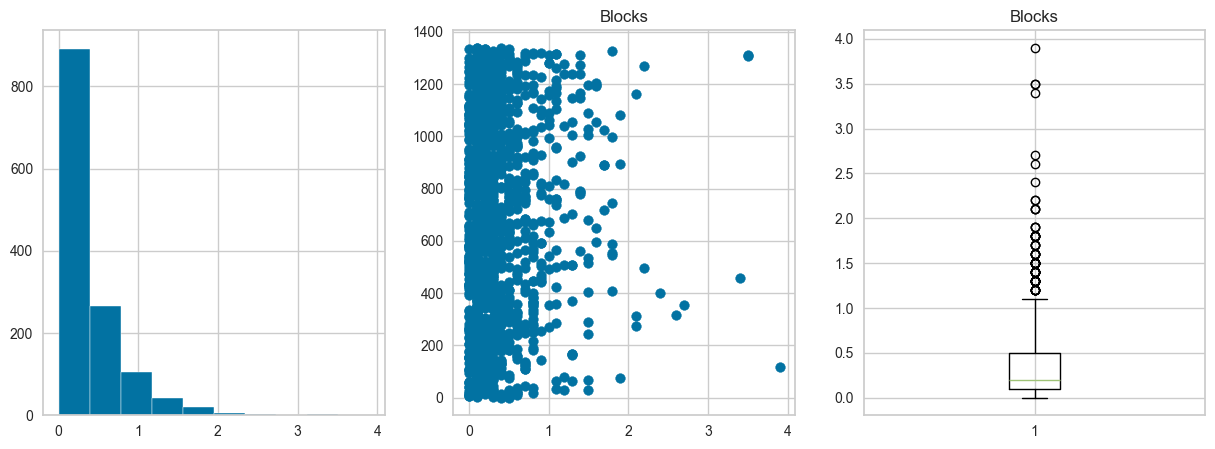

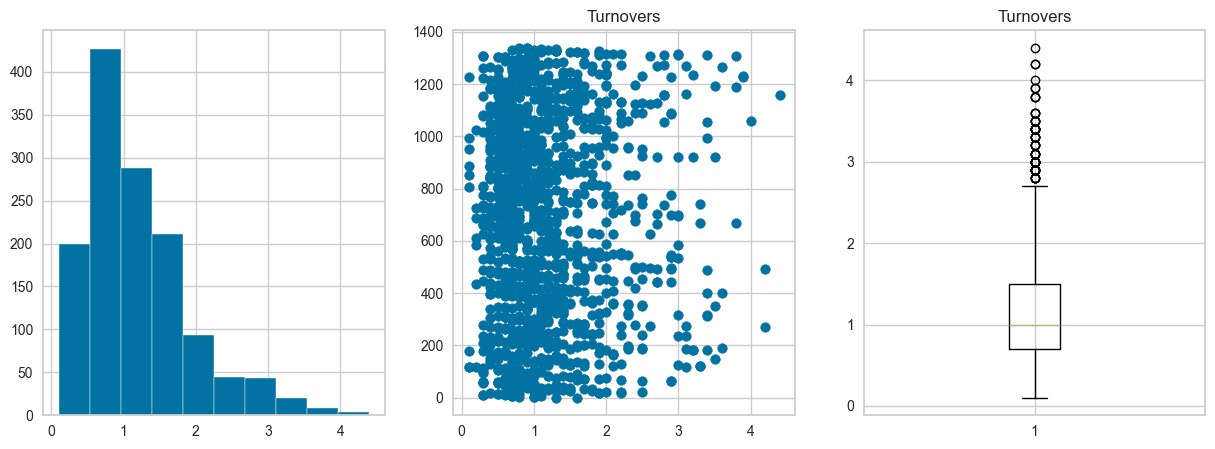

In [8]:
for num_col in df.columns:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax.flat[0].hist(df[num_col])
    ax.flat[1].scatter(df[num_col], df.index)
    ax.flat[2].boxplot(df[~df[num_col].isnull()][num_col].to_list())
    for id in range(1, 3):
        ax.flat[id].set_title(f'{num_col}')
    plt.show()

Notes:
- Most distributions are skewed.
- There are visible outliers in most of the columns.

Notes:
- As K-Means can be sensitive to outliers, we should remove the most outstanding values.

In [9]:
df = df[
      (df['FreeThrowPercent'] > 20) & \
      (df['OffensiveRebounds'] < 5) & \
      (df['Blocks'] < 3)
]

Notes:
- We can remove the 'FieldGoalMade', '3PointMade', 'FreeThrowMade' and 'Rebounds' columns, as they bring no additional information.

In [10]:
df.drop(['FieldGoalsMade', '3PointMade', 'FreeThrowMade', 'Rebounds'], axis=1, inplace=True)

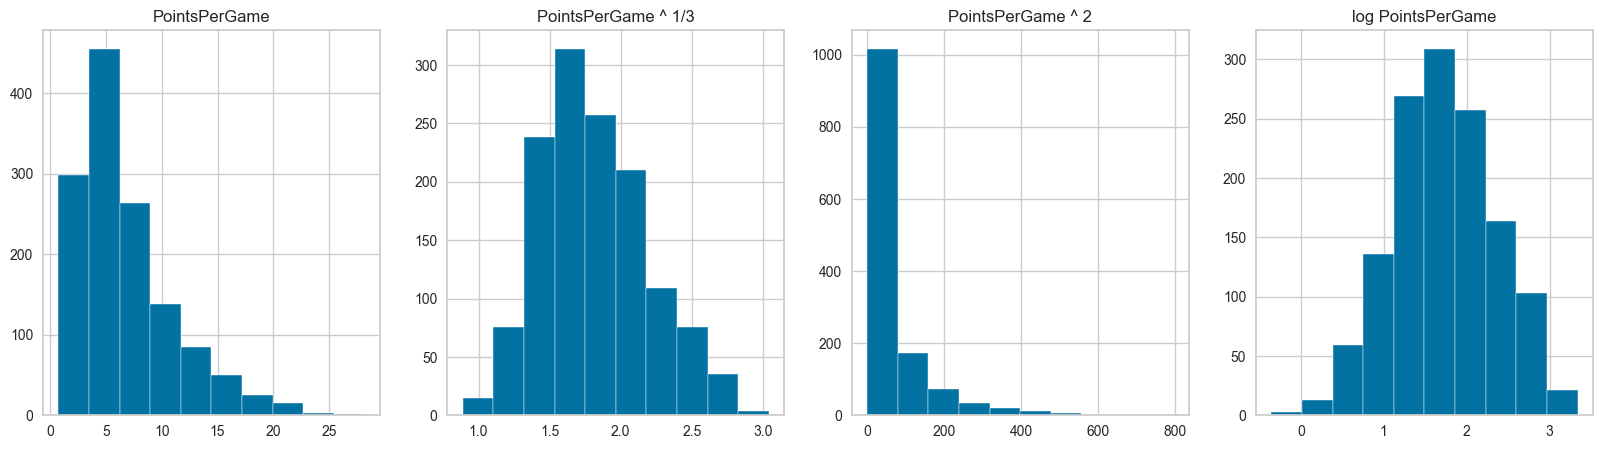

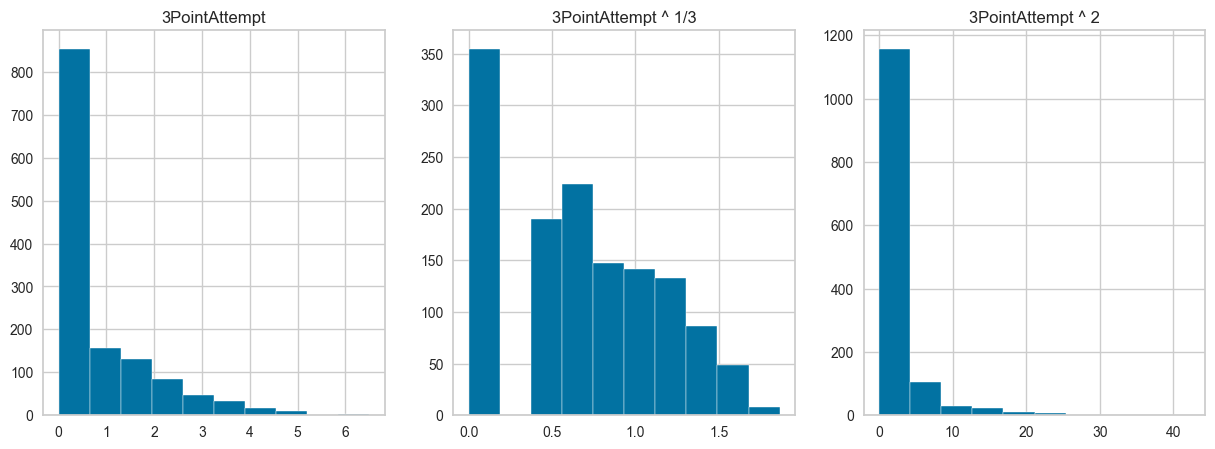

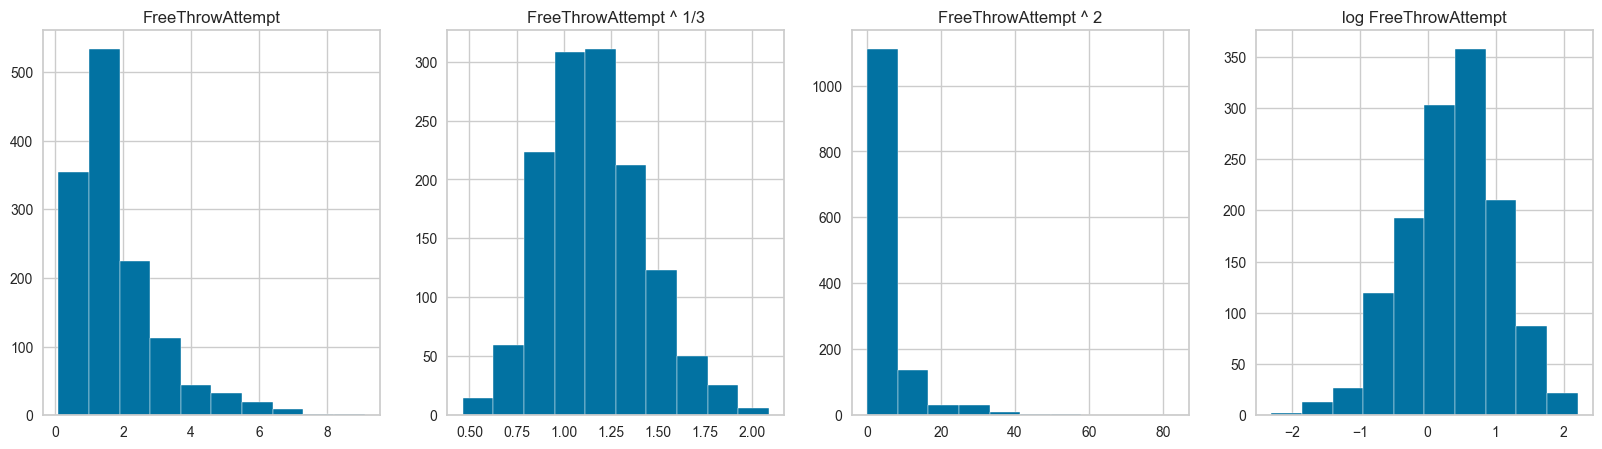

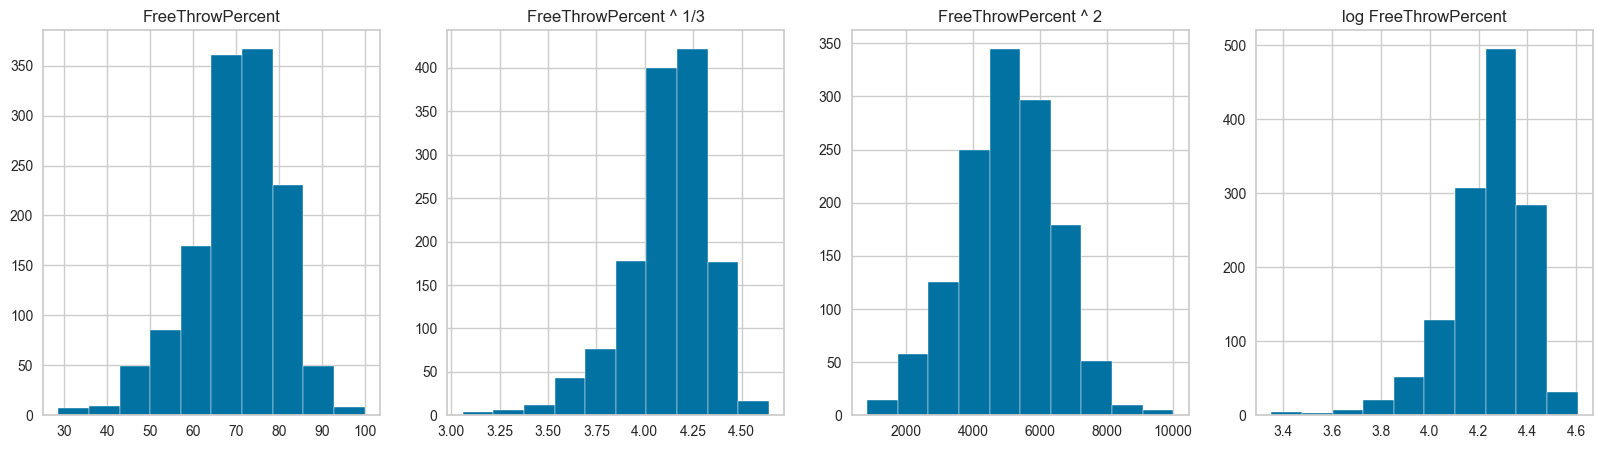

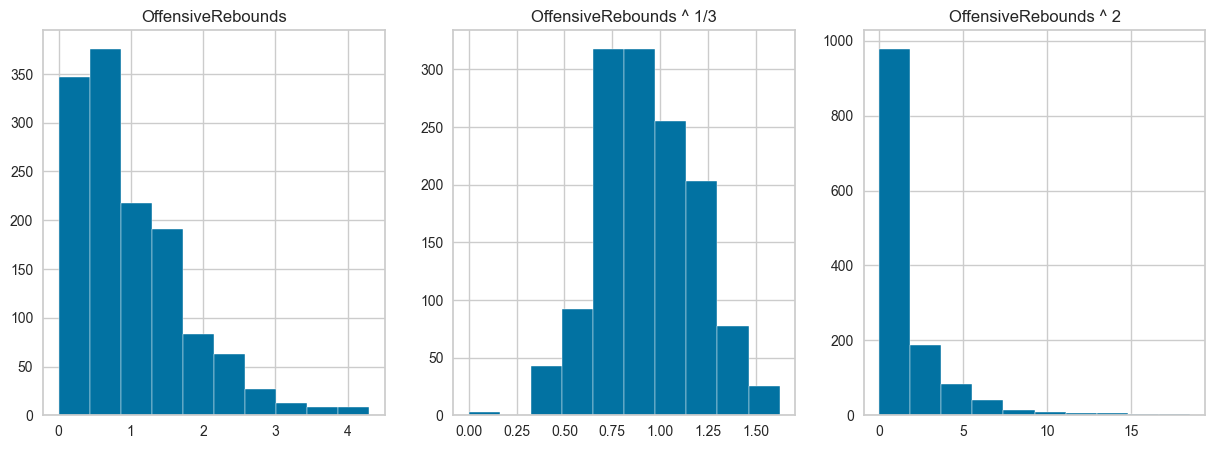

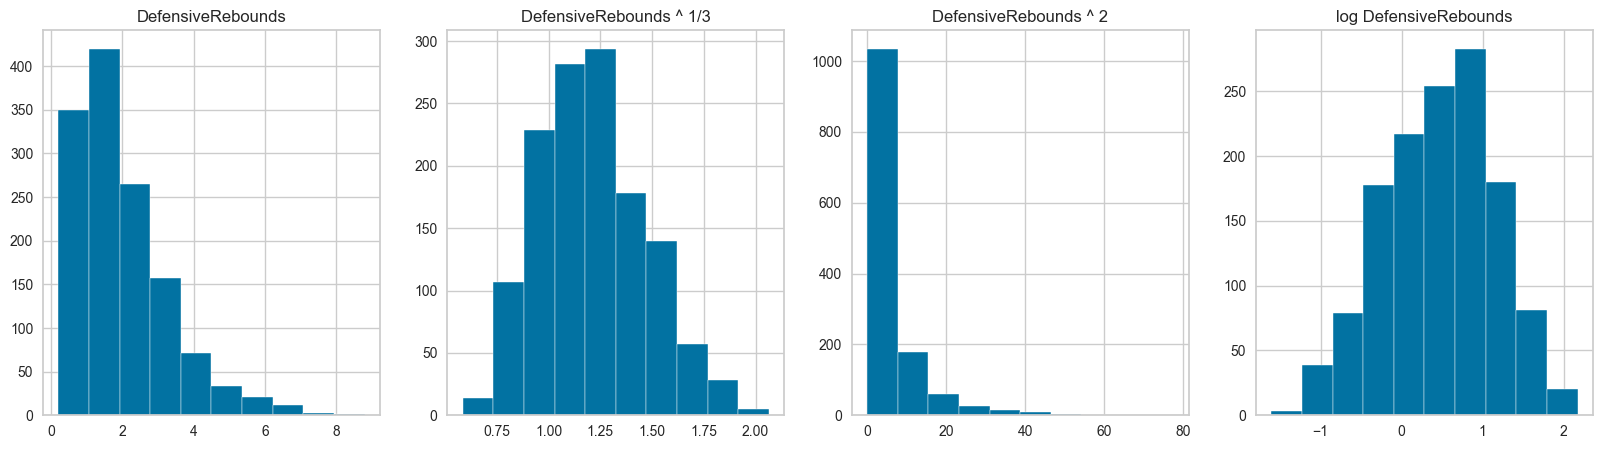

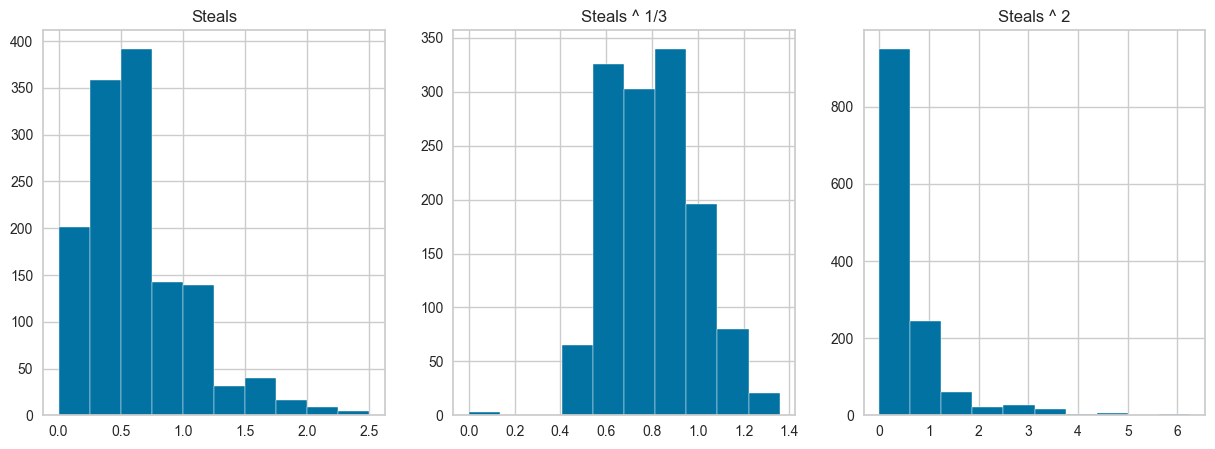

In [11]:
for num_col in df.columns:
    if num_col not in ['3PointAttempt', '3PointPercent', 'OffensiveRebounds', 'Assists', 'Steals', 'Blocks']:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        ax.flat[0].hist(df[num_col])
        ax.flat[1].hist(np.power(df[num_col], 1/3))
        ax.flat[2].hist(np.power(df[num_col], 2))
        ax.flat[3].hist(np.log(df[num_col]))
        ax.flat[0].set_title(f'{num_col}')
        ax.flat[1].set_title(f'{num_col} ^ 1/3')
        ax.flat[2].set_title(f'{num_col} ^ 2')
        ax.flat[3].set_title(f'log {num_col}')
    else:
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        ax.flat[0].hist(df[num_col])
        ax.flat[1].hist(np.power(df[num_col], 1/3))
        ax.flat[2].hist(np.power(df[num_col], 2))
        ax.flat[0].set_title(f'{num_col}')
        ax.flat[1].set_title(f'{num_col} ^ 1/3')
        ax.flat[2].set_title(f'{num_col} ^ 2')
    plt.show()

Let's apply data transformations to normalize the distributions.

In [12]:
cube_root = lambda x: np.power(df[x], 1 / 3)
square =lambda x: np.power(df[x], 2)
log =lambda x : np.log(df[x])

In [13]:
# for col in ['GamesPlayed', 'FreeThrowPercent']:
#     df[col] = square(col)

In [14]:
# for col in ['MinutesPlayed', 'FieldGoalPercent', '3PointAttempt', 'OffensiveRebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers']:
#     df[col] = cube_root(col)

In [15]:
# for col in ['PointsPerGame', 'FieldGoalsAttempt', 'FreeThrowAttempt', 'DefensiveRebounds']:
#     df[col] = log(col)

Notes:
- Experiments show that none of the data transformations seem to improve the clustering result, so we skip this step.

# Dimensionality Reduction

## Data Preparation

In [16]:
scaler = StandardScaler()

In [17]:
df_with_scaling = scaler.fit_transform(df)

## Dimensionality Reduction with PCA

### With Scaling

In [18]:
pca_scaled = PCA(n_components=2)

In [19]:
df_with_scaling = pca_scaled.fit_transform(df_with_scaling)

In [20]:
df_with_scaling

array([[ 0.62630433,  1.15593705],
       [ 1.41072972,  2.72575196],
       [-0.73982077,  0.6206718 ],
       ...,
       [-1.17477476, -2.37768248],
       [-1.85974969,  0.19450347],
       [-1.78748636,  1.72230075]])

In [21]:
pca_scaled.explained_variance_ratio_

array([0.47498243, 0.20696112])

In [22]:
component_1 = pca_scaled.components_[0]
component_2 = pca_scaled.components_[1]
names = df.columns.tolist()

xs_scaled = df_with_scaling[:,0]
ys_scaled = df_with_scaling[:,1]

In [23]:
for i in range(len(component_1)):
    plt.arrow(
        0, 
        0,
        component_1[i]*max(xs_scaled), 
        component_2[i]*max(ys_scaled),
        color='black',
        width=0.0005,
        head_width=0.0025
    )
    
    plt.text(
        component_1[i]*max(xs_scaled)*1.1, 
        component_2[i]*max(ys_scaled)*1.1,
        names[i], 
        color='r'
    )

plt.show()

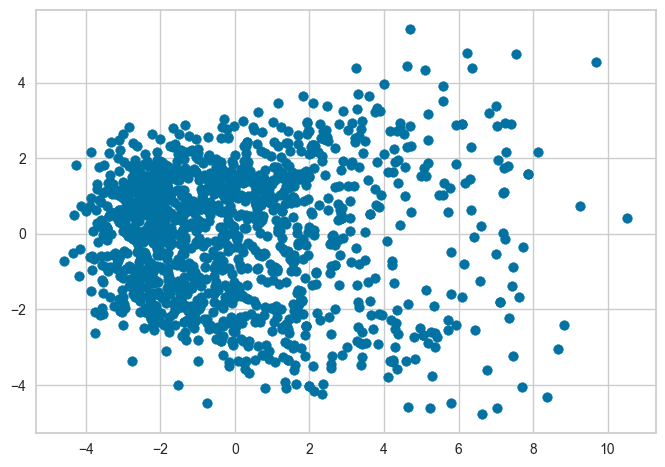

In [24]:
plt.scatter(xs_scaled, ys_scaled)

Notes:
- Using PCA with scaled data doesn't seem to create distinct clusters.

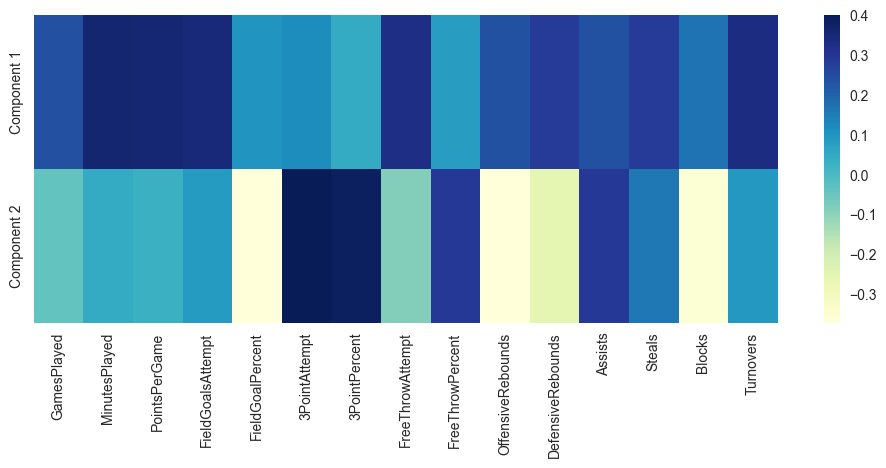

In [25]:
plt.figure(figsize=(12, 4))

sns.heatmap(pca_scaled.components_,
    cmap='YlGnBu',
    yticklabels=[ "Component " + str(x) for x in range(1, pca_scaled.n_components_ + 1)],
    xticklabels=names,
    cbar_kws={"orientation": "vertical"}
)
plt.show()

### Without Scaling

In [26]:
pca_non_scaled = PCA(n_components=2)

In [27]:
df_no_scaling = pca_non_scaled.fit_transform(df)

In [28]:
df_no_scaling

array([[ 16.23776488,  14.58517303],
       [ 16.62480432,  16.15812598],
       [-11.04509066,  -0.4531814 ],
       ...,
       [ 23.27459994, -14.69657204],
       [ 13.95506822,  -7.14454506],
       [ 10.93173851,  17.74355221]])

In [29]:
pca_non_scaled.explained_variance_ratio_

array([0.44707748, 0.33416421])

In [30]:
component_1 = pca_non_scaled.components_[0]
component_2 = pca_non_scaled.components_[1]
names = df.columns.tolist()

xs_no_scaling = df_no_scaling[:,0]
ys_no_scaling = df_no_scaling[:,1]

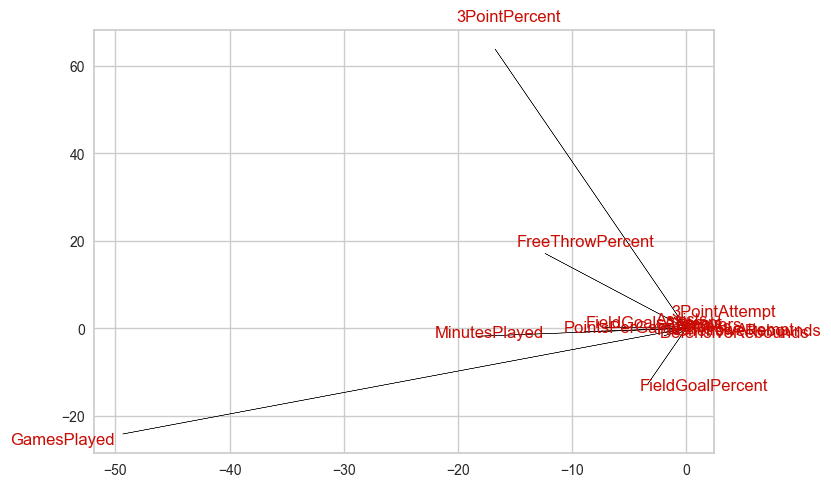

In [31]:
for i in range(len(component_1)):
    plt.arrow(
        0, 
        0,
        component_1[i]*max(xs_no_scaling), 
        component_2[i]*max(ys_no_scaling),
        color='black',
        width=0.0005,
        head_width=0.0025
    )
    
    plt.text(
        component_1[i]*max(xs_no_scaling)*1.2, 
        component_2[i]*max(ys_no_scaling)*1.1,
        names[i], 
        color='r'
    )

plt.show()

In [32]:
plt.scatter(xs_no_scaling, ys_no_scaling)

Notes:
- Using PCA with the original data doesn't seem to create distinct clusters either.

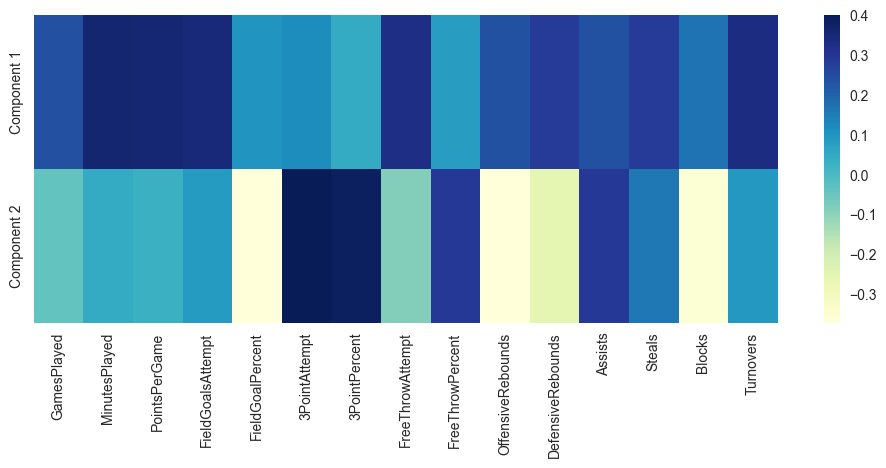

In [33]:
plt.figure(figsize=(12, 4))

sns.heatmap(pca_scaled.components_,
    cmap='YlGnBu',
    yticklabels=[ "Component " + str(x) for x in range(1, pca_scaled.n_components_ + 1)],
    xticklabels=names,
    cbar_kws={"orientation": "vertical"}
)
plt.show()

## Dimensionality Reduction with TSNE

### With Scaling

In [34]:
tsne_scaled = TSNE(n_components=2, random_state=0)

In [35]:
df_with_scaling = tsne_scaled.fit_transform(df_with_scaling)

In [36]:
xs_scaled = df_with_scaling[:,0]
ys_scaled = df_with_scaling[:,1]

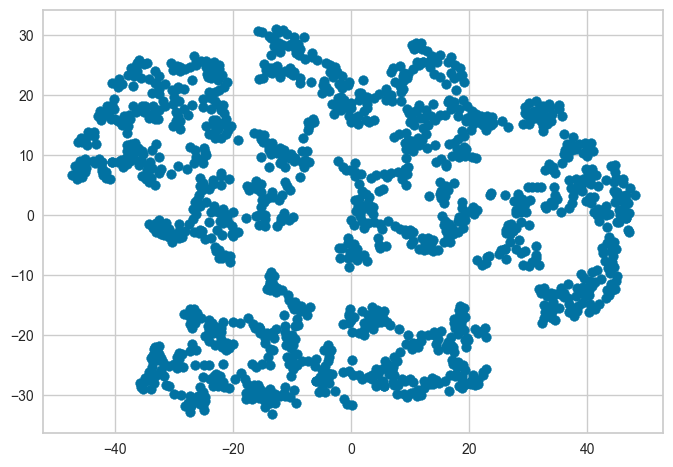

In [37]:
plt.scatter(xs_scaled, ys_scaled)

### Without Scaling

In [38]:
tsne_non_scaled = TSNE(n_components=2, random_state=0)

In [39]:
df_no_scaling = tsne_non_scaled.fit_transform(df)

In [40]:
xs_no_scaling = df_no_scaling[:,0]
ys_no_scaling = df_no_scaling[:,1]

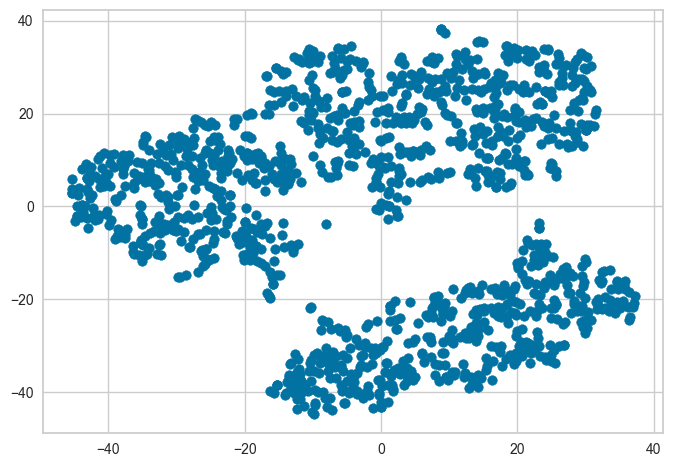

In [41]:
plt.scatter(xs_no_scaling, ys_no_scaling)

## Dimensionality Reduction with UMAP

### With Scaling

In [42]:
umap_scaled = umap.UMAP(n_components=2)

In [43]:
df_with_scaling = umap_scaled.fit_transform(df_with_scaling)

In [44]:
xs_scaled = df_with_scaling[:,0]
ys_scaled = df_with_scaling[:,1]

In [45]:
plt.scatter(xs_scaled, ys_scaled)

### Without Scaling

In [46]:
umap_non_scaled = umap.UMAP(n_components=2)

In [47]:
df_no_scaling = umap_non_scaled.fit_transform(df)

In [48]:
xs_no_scaling = df_no_scaling[:,0]
ys_no_scaling = df_no_scaling[:,1]

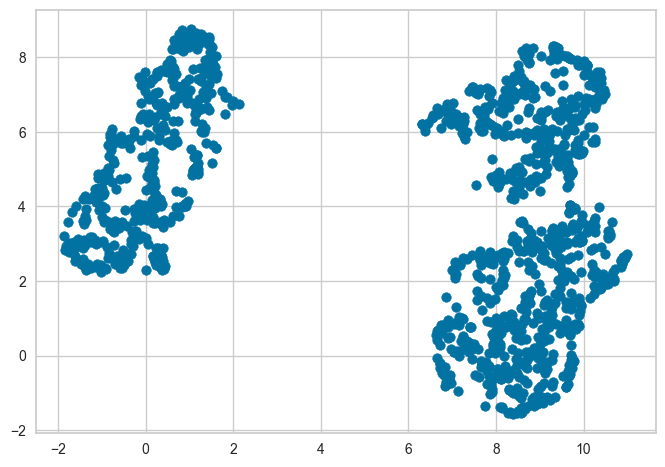

In [49]:
plt.scatter(xs_no_scaling, ys_no_scaling)

# Clustering

In [50]:
clustering_summary = pd.DataFrame(columns=['Type', 'Silhouette Score', 'Davies-Bouldin Score'])

## K-Means Clustering with 2 Clusters

### With Scaling

In [51]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(df_with_scaling)

In [52]:
fig, axs = plt.subplots(1, 1)

labels = kmeans.predict(df_with_scaling)

sns.scatterplot(
    x=xs_scaled, 
    y=ys_scaled,
    hue=labels
)
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0], 
    y=kmeans.cluster_centers_[:, 1], 
    s=300,
    color='r'
)
plt.plot()

[]

In [53]:
s_score = silhouette_score(df_with_scaling, labels)
db_score = davies_bouldin_score(df_with_scaling, labels)
s_score, db_score

(0.4515046, 0.7419952039837219)

In [54]:
clustering_summary.loc[clustering_summary.shape[0]] = ('KM, WithS', s_score, db_score)

### Without Scaling

In [55]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(df_no_scaling)

[]

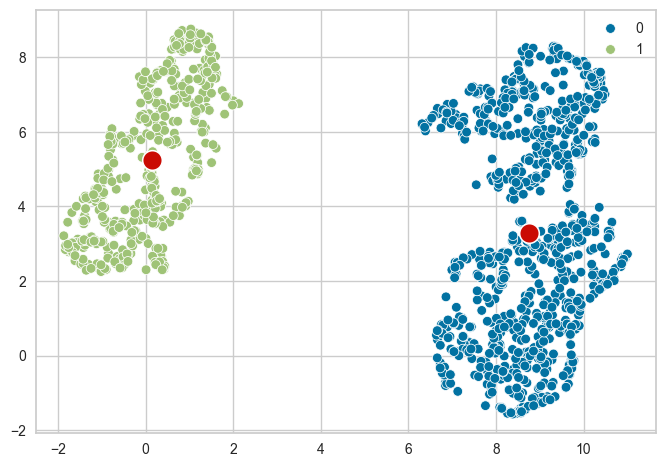

In [56]:
labels = kmeans.predict(df_no_scaling)
sns.scatterplot(
    x=xs_no_scaling, 
    y=ys_no_scaling,
    hue=labels
)
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0], 
    y=kmeans.cluster_centers_[:, 1], 
    s=200,
    color='r'
)
plt.plot()

In [57]:
s_score = silhouette_score(df_no_scaling, labels)
db_score = davies_bouldin_score(df_no_scaling, labels)
s_score, db_score

(0.6423835, 0.5441913582734325)

In [58]:
clustering_summary.loc[clustering_summary.shape[0]] = ('KM, NoS', s_score, db_score)

## K-Means with k Clusters

### With Scaling

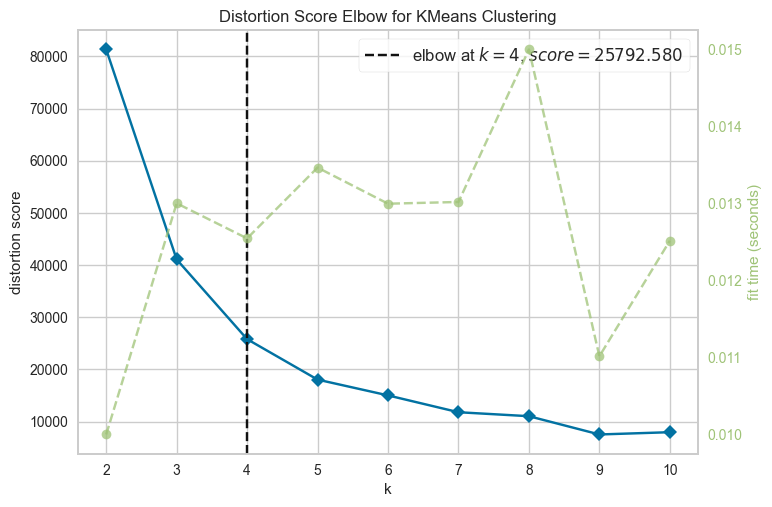

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
k_elbow = KElbowVisualizer(KMeans(), k=10)
k_elbow.fit(df_with_scaling)
k_elbow.show()

In [60]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(df_with_scaling)

[]

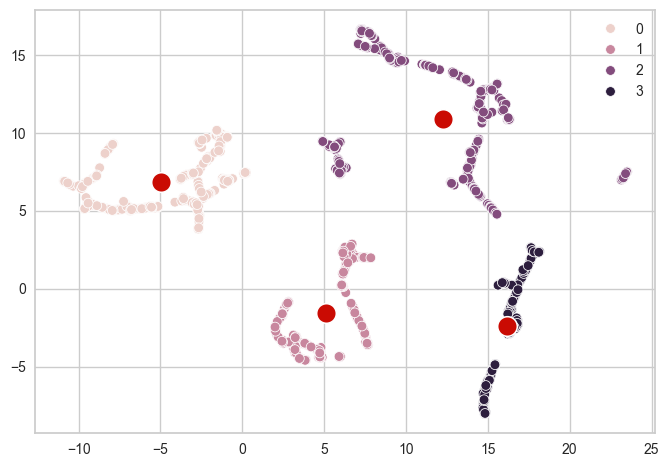

In [61]:
sns.scatterplot(
    x=xs_scaled, 
    y=ys_scaled,
    hue=kmeans.predict(df_with_scaling)
)
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0], 
    y=kmeans.cluster_centers_[:, 1], 
    s=200,
    color='r'
)
plt.plot()

### Without Scaling

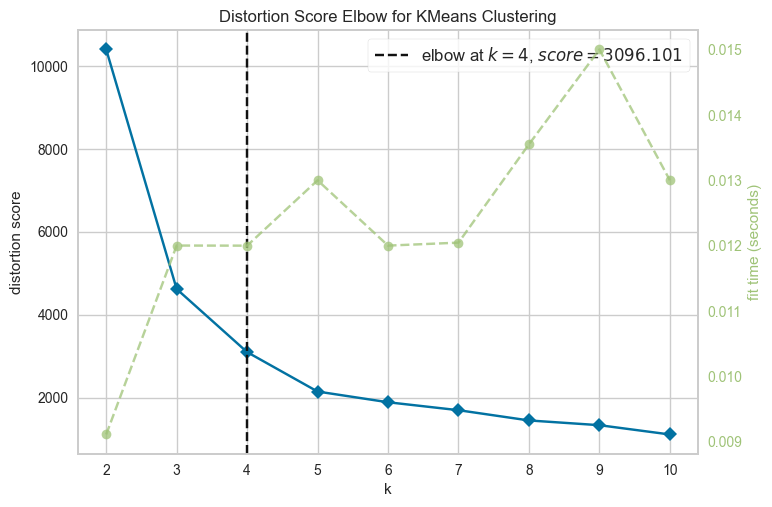

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
k_elbow = KElbowVisualizer(KMeans(), k=10)
k_elbow.fit(df_no_scaling)
k_elbow.show()

In [63]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(df_no_scaling)

[]

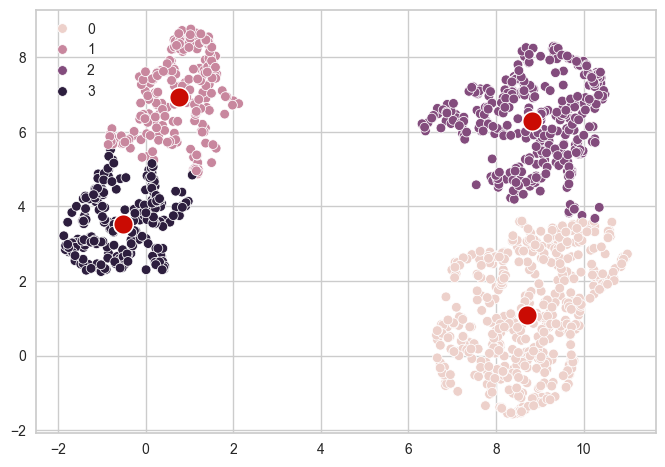

In [64]:
sns.scatterplot(
    x=xs_no_scaling, 
    y=ys_no_scaling,
    hue=kmeans.predict(df_no_scaling)
)
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0], 
    y=kmeans.cluster_centers_[:, 1], 
    s=200,
    color='r'
)
plt.plot()

## Agglomerative Clustering

In [65]:
def plot_dendogram(Z):
    plt.figure(figsize=(10, 7))
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title('Dendrogram')
    plt.ylabel('Distance')
    plt.show()

### With Scaling

In [66]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')

labels = agg_clustering.fit_predict(df_with_scaling)

[]

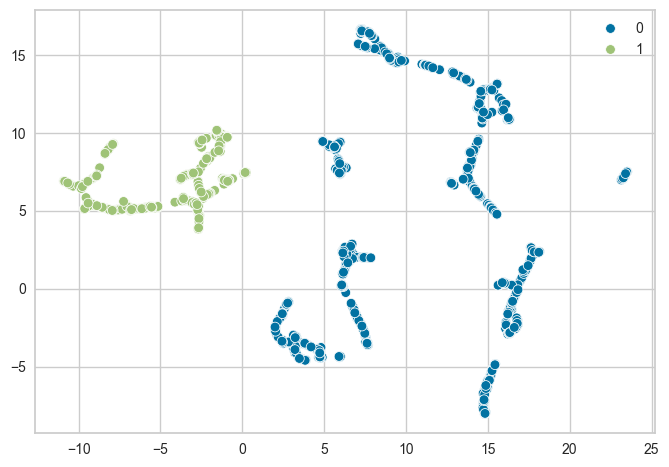

In [67]:
sns.scatterplot(
    x=xs_scaled, 
    y=ys_scaled,
    hue=labels
)
plt.plot()

In [68]:
Z = linkage(df_with_scaling, method='complete', metric='euclidean')
plot_dendogram(Z)

In [69]:
s_score = silhouette_score(df_with_scaling, labels)
db_score = davies_bouldin_score(df_with_scaling, labels)
s_score, db_score

(0.4515046, 0.7419952039837219)

In [70]:
clustering_summary.loc[clustering_summary.shape[0]] = ('AC, WithS', s_score, db_score)

### Without Scaling

In [71]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
labels = agg_clustering.fit_predict(df_no_scaling)

[]

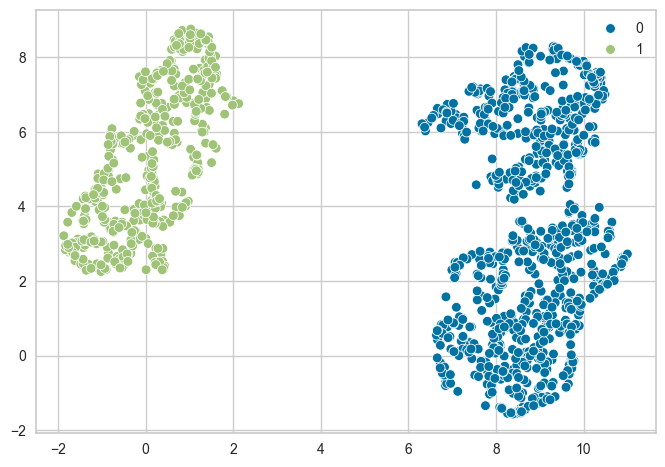

In [72]:
sns.scatterplot(
    x=xs_no_scaling, 
    y=ys_no_scaling,
    hue=labels
)
plt.plot()

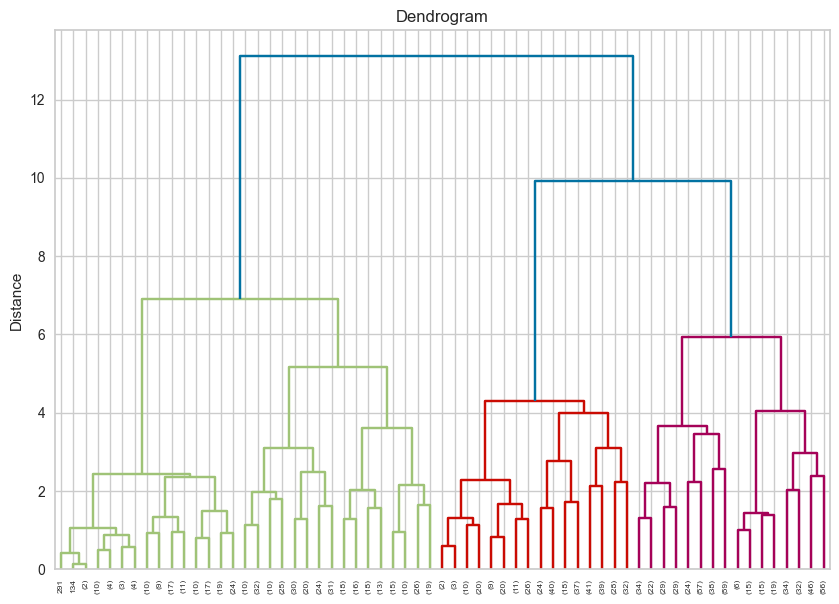

In [73]:
Z = linkage(df_no_scaling, method='complete', metric='euclidean')
plot_dendogram(Z)

In [74]:
s_score = silhouette_score(df_no_scaling, labels)
db_score = davies_bouldin_score(df_no_scaling, labels)
s_score, db_score

(0.6423835, 0.5441913582734325)

In [75]:
clustering_summary.loc[clustering_summary.shape[0]] = ('AC, NoS', s_score, db_score)

## DBSCAN

### With Scaling

In [76]:
dbscan = DBSCAN(eps=0.9, min_samples=10, metric='euclidean')

In [77]:
labels = dbscan.fit_predict(df_with_scaling)

[]

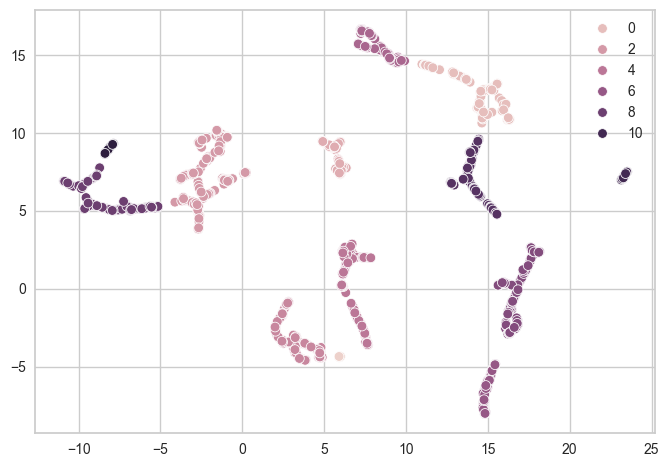

In [78]:
sns.scatterplot(
    x=xs_scaled, 
    y=ys_scaled,
    hue=labels
)
plt.plot()

In [79]:
s_score = silhouette_score(df_with_scaling, labels)
db_score = davies_bouldin_score(df_with_scaling, labels)
s_score, db_score

(0.5551873, 0.508980363068426)

In [80]:
clustering_summary.loc[clustering_summary.shape[0]] = ('DB, WithS', s_score, db_score)

### Without Scaling

In [81]:
dbscan = DBSCAN(eps=0.9, min_samples=10, metric='euclidean')

In [82]:
labels = dbscan.fit_predict(df_no_scaling)

[]

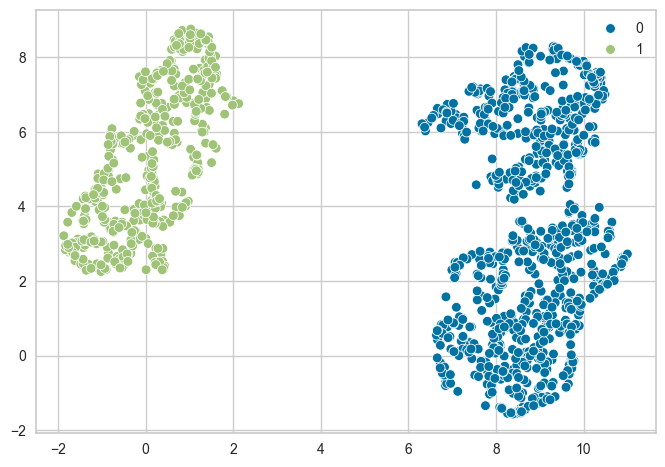

In [83]:
sns.scatterplot(
    x=xs_no_scaling, 
    y=ys_no_scaling,
    hue=labels
)
plt.plot()

In [84]:
s_score = silhouette_score(df_no_scaling, labels)
db_score = davies_bouldin_score(df_no_scaling, labels)
s_score, db_score

(0.6423835, 0.5441913582734325)

In [85]:
clustering_summary.loc[clustering_summary.shape[0]] = ('DB, NoS', s_score, db_score)

## HDBSCAN

### With Scaling

In [86]:
hdbscan = HDBSCAN(min_samples=70)

In [87]:
labels = hdbscan.fit_predict(df_with_scaling)

[]

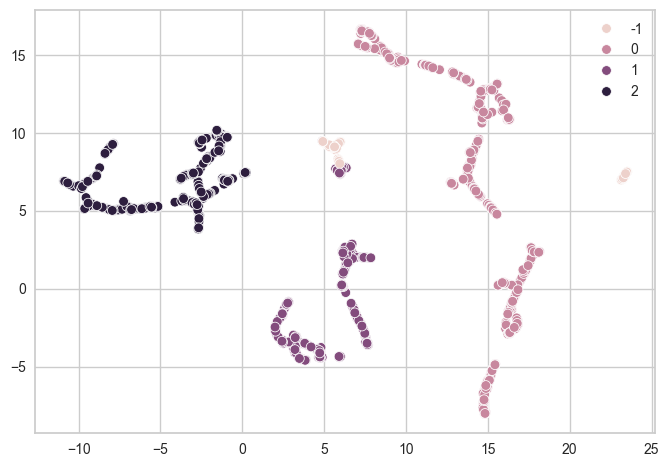

In [88]:
sns.scatterplot(
    x=xs_scaled, 
    y=ys_scaled,
    hue=labels
)
plt.plot()

In [89]:
s_score = silhouette_score(df_with_scaling, labels)
db_score = davies_bouldin_score(df_with_scaling, labels)
s_score, db_score

(0.37807032, 3.6978246836917235)

In [90]:
clustering_summary.loc[clustering_summary.shape[0]] = ('HD, WithS', s_score, db_score)

### Without Scaling

In [91]:
hdbscan = HDBSCAN(min_samples=70)

In [92]:
labels = hdbscan.fit_predict(df_no_scaling)

[]

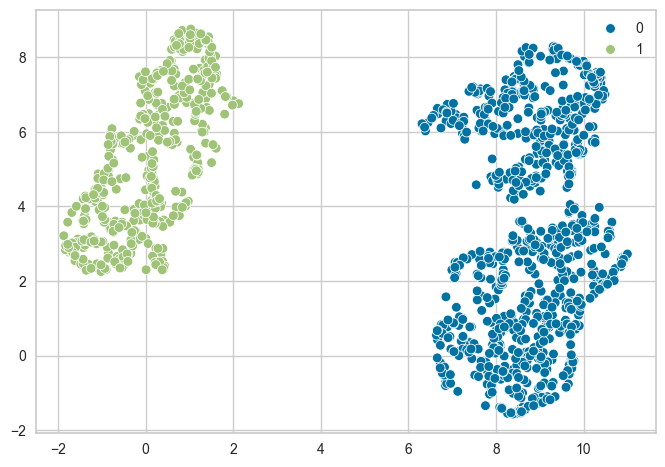

In [93]:
sns.scatterplot(
    x=xs_no_scaling, 
    y=ys_no_scaling,
    hue=labels
)
plt.plot()

In [94]:
s_score = silhouette_score(df_no_scaling, labels)
db_score = davies_bouldin_score(df_no_scaling, labels)
s_score, db_score

(0.6423835, 0.5441913582734325)

In [95]:
clustering_summary.loc[clustering_summary.shape[0]] = ('HD, NoS', s_score, db_score)

## Conclusion

In [96]:
clustering_summary

Type  Silhouette Score  Davies-Bouldin Score
0  KM, WithS          0.451505              0.741995
1    KM, NoS          0.642384              0.544191
2  AC, WithS          0.451505              0.741995
3    AC, NoS          0.642384              0.544191
4  DB, WithS          0.555187              0.508980
5    DB, NoS          0.642384              0.544191
6  HD, WithS          0.378070              3.697825
7    HD, NoS          0.642384              0.544191

Notes:
- Agglomerative clustering, DBSCAN and HDBSCAN perform the best on the given data.
- PCA works better with scaled data, but overall performs poorly on this dataset.